# Anti-Fragility of Financial Portfolios - Srikar Godilla

## Background

The word antifragile was coined by Nassim Taleb in his 2012 book of the same name. Nassim Taleb started his career as a derivatives trader on Wall Street but in fact, despises many of the models used by the finance industry. His philosophy revolves around a fundamental idea: The world is run by "fat tails" - extremely rare events carry the greatest consequences and yet are the most difficult to predict. Taleb calls these kinds of events "Black Swans". His investment strategy focuses on leveraging these black swans for huge profits. In fact, the way Taleb made his money was by profiting off of the 1987 market crash, the dotcom tech bubble, and the late 2000’s financial crisis.


## Black Swans

Black Swans are incredibly rare but impactful events - they can be positive or negative. We often fall prey to Black Swans because we think that we can predict them. This is because we humans like to create explanations for the inexplicable. It is important to remember that hindsight is always 20/20. To illustrate this point we can take a look at the history of the S&P 500 over the last 50 years.

In [15]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

<Axes: title={'center': 'S&P 500 History'}, xlabel='Date'>

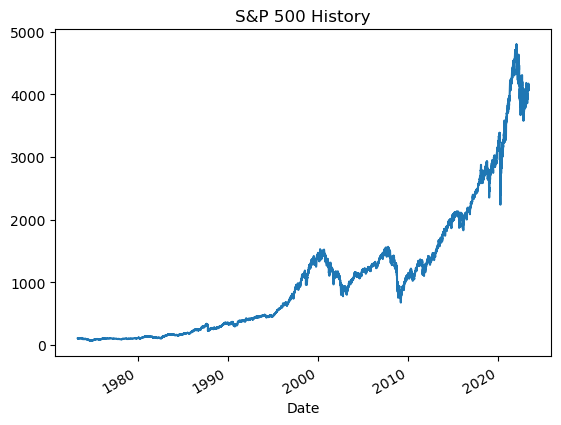

In [16]:
ticker = yf.Ticker('^GSPC')
SP_500 = ticker.history(period="50y")
SP_500['Close'].plot(title="S&P 500 History")

As we can see the market has had several black swan events over the last 20 years. There was Black Monday in 1987, the dot com bubble in 2000, the 2008 housing market crash, and most recently the Covid pandemic. 

## Dealing with Black Swans

One of the fundament properties of Black Swans is that they are unpredictable. Despite what finance gurus will tell us, one will likely be unable to predict these black swan events. So, how can we deal with these black swan events if we can't predict when they can happen? What we do is that we don't try to deal with these black swan events. Instead, we instead focus on building systems that benefit from these black swan events. This is where the idea of antifragility comes into play. Inherently, complex systems (such as the financial system) are volatile by nature. Rather than trying to fight this volatility, we can try to benefit from it by creating a financial portfolio that is antifragile. But, what does antifragility mean and how can we identify systems that have this kind of desired behavior?

## What is antifragility?

To understand antifragility we must first understand the definition of fragility. What is something that is fragile? It's something that has negative outcomes when exposed to volatility - like a glass cup. Perturbing the glass cup by pushing it off of a table will cause it to shatter. But, then what is the opposite of fragility? Most people would answer robust, or resilient. But, that isn't the exact opposite of fragility. Something that is robust would be a plastic cup - knocking it off a table would not cause it to break. However, the true inverse of fragile would be something that actually has positive outcomes when exposed to perturbations. Something robust, however, would not have good or bad outcomes when exposed to volatility. The true inverse of fragile would then be antifragility.

It turns out that antifragility is quite a useful property for a system to have. In fact, many things in nature are antifragile processes. Take exercise and muscles for instance. By exercising a muscle, one is actually causing damage to that muscle. However, in the process of damaging that muscle, the body compensates by creating better and more muscle tissue so that the muscle is better able to handle stresses in the future. This behavior of harm causing beneficial effects in biological systems is called hormesis. Another tremendous example of antifragility would be evolution. Stressors in the environment will cause harm to an individual member of a species but the end result of this selection and genetic variation is a species that is better adapted to its environment. In this way the individual components of a system can be fragile but the system as a whole is antifragile. Antifragile systems over time (as a result of being exposed to stressors and volatility) will get stronger/better. The drawback of an antifragile system, however, is that it requires volatility to function. A muscle that is not exercised will atrophy over time.

## Properties of Antifragile Systems

To demonstrate the mathematical properties of fragile, robust, and antifragile systems, we can use some simple mathematical models. Any system can be modeled as the relationship between two variables x - perturbation intensity, and f(x) - system response. x could be the height from which the glass cup is dropped and f(x) is the amount of damage done to the cup.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

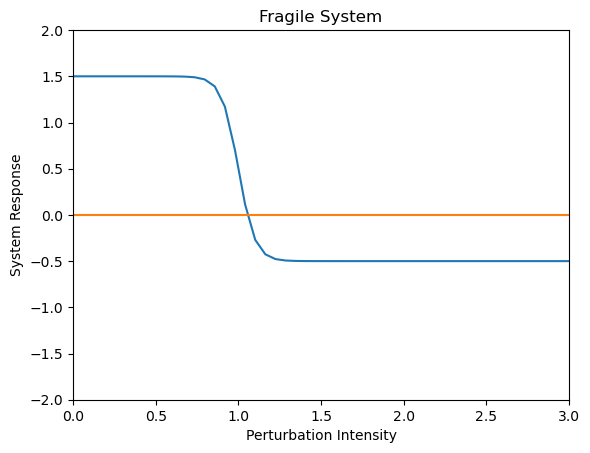

In [25]:
x = np.linspace(0, 3, 50)
y = 2*(1/(1+pow(math.e, 20*(x-1))))-0.5
cutoff = [0 for i in range(50)]
plt.plot(x, y, label='System Response')
plt.plot(x, cutoff, label='Harm Cutoff')
plt.xlim(0, 3)
plt.ylim(-2, 2)
plt.title("Fragile System")
plt.xlabel("Perturbation Intensity")
plt.ylabel("System Response")
plt.show()

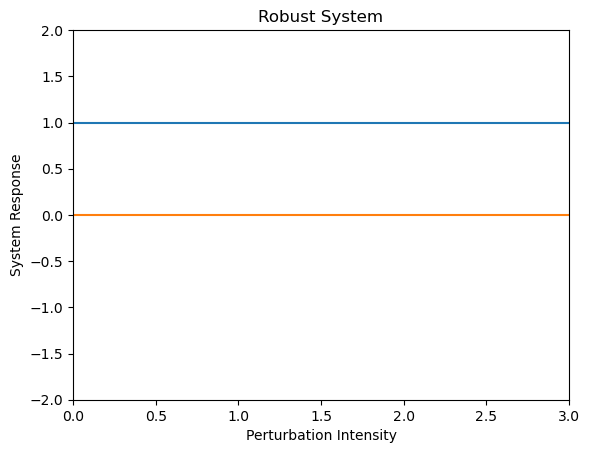

In [26]:
x = np.linspace(0, 3, 50)
y = [1 for i in range(50)]
cutoff = [0 for i in range(50)]
plt.plot(x, y, label='System Response')
plt.plot(x, cutoff, label='Harm Cutoff')
plt.xlim(0, 3)
plt.ylim(-2, 2)
plt.title("Robust System")
plt.xlabel("Perturbation Intensity")
plt.ylabel("System Response")
plt.show()

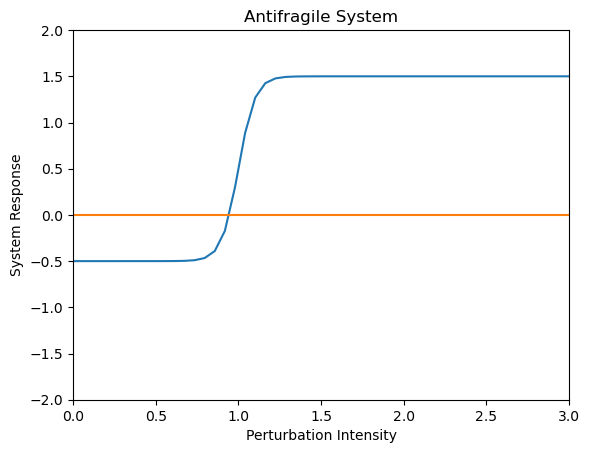

In [28]:
x = np.linspace(0, 3, 50)
y = -(2*(1/(1+pow(math.e, 20*(x-1))))-1.5)
cutoff = [0 for i in range(50)]
plt.plot(x, y, label='System Response')
plt.plot(x, cutoff, label='Harm Cutoff')
plt.xlim(0, 3)
plt.ylim(-2, 2)
plt.title("Antifragile System")
plt.xlabel("Perturbation Intensity")
plt.ylabel("System Response")
plt.show()

Above are shown the responses of a fragile, robust, and antifragile system. A fragile system is like a glass cup. A shock with a certain intensity will cause tremendous harm. A robust system, however, remains constant in its response regardless of exposure to perturbations. Finally, an antifragile system actually has negative outcomes at little to no perturbation but has very good outcomes when exposed to volatility. In this way, an antifragile system is the mathematical inverse of a fragile system.

## Stressors are points of information

As we can see from the models above, what identifies a system as fragile or antifragile is how it responds to stressors from the environment. Choosing the correct metrics here is therefore incredibly important.

## Measuring the Fragility of a Financial Portfolio

The first axis of comparison we can do is to compare the trajectory of the market to the performance of a particular stock. But, what we want to do is find the stock's response to stressors - not just its base level of performance. This is where we need to do some calculus. What we need to do is find the velocity (2nd derivative) of the market and a stock. Plotting the velocity of the market versus the velocity of the stock will allow us to see how a stock responds to the market going up or down.

In [39]:
from datetime import date, timedelta

In [54]:
def moving_average(data, window):
    return np.convolve(data, np.ones(window), 'valid') / window

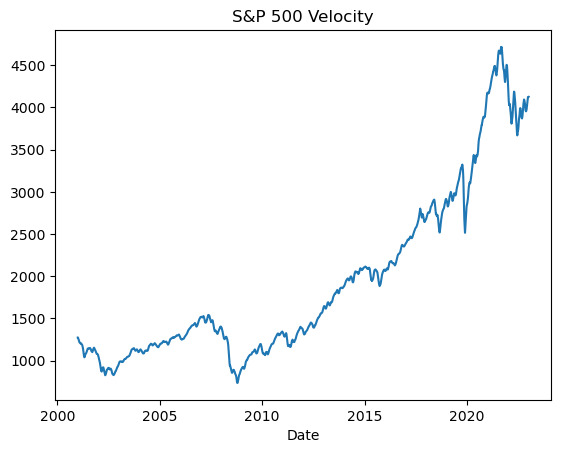

In [84]:
ticker = yf.Ticker('^GSPC')
SP_500 = ticker.history(period="22y")
SP_500_filtered = moving_average(SP_500['Close'], 20)
dates = np.linspace(2001, 2023, SP_500_filtered.size)

plt.plot(dates, SP_500_filtered)
plt.title("S&P 500 Filtered")
plt.xlabel("Date")
plt.show()

We first clean up the data for analysis by passing it through a low-pass (moving average) filter. This eliminates all of the micro-volatility so we can focus on the longer-time scale variations.

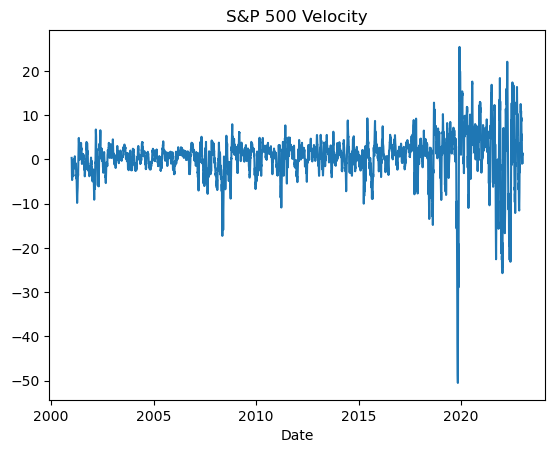

In [85]:
SP_500_velocity = np.gradient(SP_500_filtered)
dates = np.linspace(2001, 2023, SP_500_velocity.size)

plt.plot(dates, SP_500_velocity)
plt.title("S&P 500 Velocity")
plt.xlabel("Date")
plt.show()

We can take the derivative of the stock data to find the velocity of the market - how fast the market is going up or down.

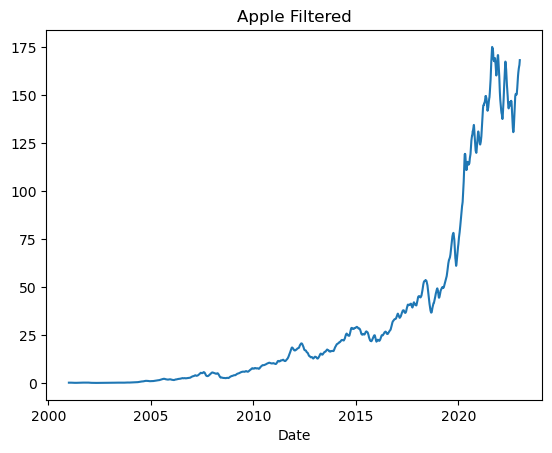

In [87]:
ticker = yf.Ticker('AAPL')
apple = ticker.history(period="22y")
apple_filtered = moving_average(apple['Close'], 20)
dates = np.linspace(2001, 2023, apple_filtered.size)

plt.plot(dates, apple_filtered)
plt.title("Apple Filtered")
plt.xlabel("Date")
plt.show()

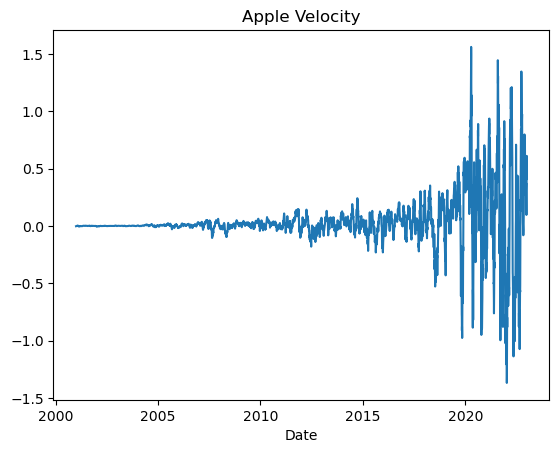

In [88]:
apple_velocity = np.gradient(apple_filtered)
dates = np.linspace(2001, 2023, SP_500_velocity.size)

plt.plot(dates, apple_velocity)
plt.title("Apple Velocity")
plt.xlabel("Date")
plt.show()

We do this same data cleanup and processing for our candidate stock.

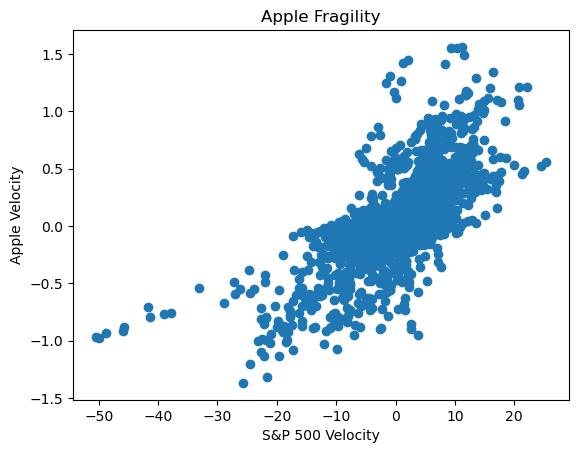

In [90]:
plt.scatter(SP_500_velocity, apple_velocity)
plt.title("Apple Fragility")
plt.xlabel("S&P 500 Velocity")
plt.ylabel("Apple Velocity")
plt.show()

We can then find the fragility of our candidate stock by visualizing its response to market pressures. To do this we just need to plot the candidate stock's velocity versus the velocity of the market. If the market goes down quickly, we want to see if the candidate stock also goes down as quickly or goes down slower. 

In [169]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum(xi*yi for xi,yi in zip(X, Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

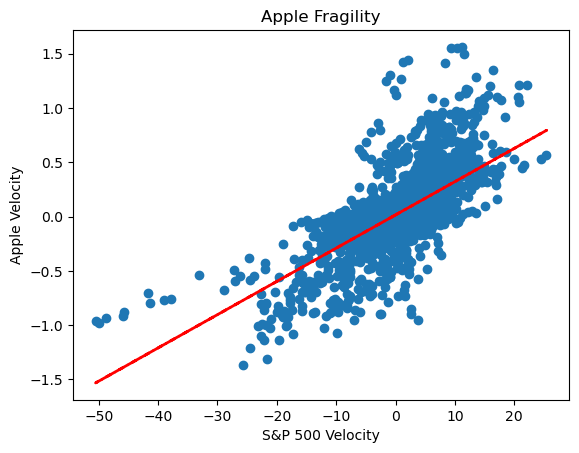

best fit line:
y = 0.01 + 0.03x
Apple Fragility index = 0.058165590369760975


In [211]:
# find best fit line
a, b = best_fit(SP_500_velocity, apple_velocity)

plt.scatter(SP_500_velocity, apple_velocity)
fit = [a + b * xi for xi in SP_500_velocity]
plt.plot(SP_500_velocity, fit, color='red', linestyle='--', linewidth=2)
plt.title("Apple Fragility")
plt.xlabel("S&P 500 Velocity")
plt.ylabel("Apple Velocity")
plt.show()

print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

fragility_index = sum(np.multiply(abs(SP_500_velocity), apple_velocity)) / apple_velocity.size
print('Apple Fragility index = ' + str(fragility_index))

We can then calculate the fragility index by essentially finding the average response of the stock to a shock. Essentially, each data point in the velocity array will be multiplied by the absolute value of the corresponding S&P velocity. The average of all these products is the fragility index. Here we can see that apple stock has been slightly antifragile through its lifetime. This makes it a very good stock to invest in since it is resilient to shocks in the market. 

In [299]:
def plot_fragility(ticker):
    SP_500_ticker = yf.Ticker('^GSPC')
    SP_500 = SP_500_ticker.history(period="22y")
    SP_500_filtered = moving_average(SP_500['Close'], 20)
    SP_500_velocity = np.gradient(SP_500_filtered)
    
    test_ticker = yf.Ticker(ticker)
    test_name = test_ticker.info['shortName']
    test = test_ticker.history(period="22y")
    test_filtered = moving_average(test['Close'], 20)
    test_velocity = np.gradient(test_filtered)
    
    if len(SP_500_velocity) > len(test_velocity):
        test_velocity = np.pad(test_velocity, (0, len(SP_500_velocity) - len(test_velocity)))
    elif len(SP_500_velocity) < len(test_velocity):
        SP_500_velocity = np.pad(SP_500_velocity, (0, len(test_velocity) - len(SP_500_velocity)))

    a, b = best_fit(SP_500_velocity, test_velocity)
    fit = [a + b * xi for xi in SP_500_velocity]
    
    dates = np.linspace(2001, 2023, test_filtered.size)

    plt.plot(dates, test_filtered)
    plt.title(test_name + " Filtered")
    plt.xlabel("Date")
    plt.show()
    
    plt.scatter(SP_500_velocity[-test_velocity.size:], test_velocity)
    plt.plot(SP_500_velocity, fit, color='red', linestyle='--', linewidth=2)
    plt.title(test_name + " Fragility")
    plt.xlabel("S&P 500 Velocity")
    plt.ylabel(test_name + " Velocity")
    plt.show()
    
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    
    fragility_index = sum(np.multiply(abs(SP_500_velocity), test_velocity)) / test_velocity.size
    print(test_name + ' Fragility index = ' + str(fragility_index))
    
    return fragility_index
    

We can now condence this analysis into a single function so we can analyze several other candidate stocks.

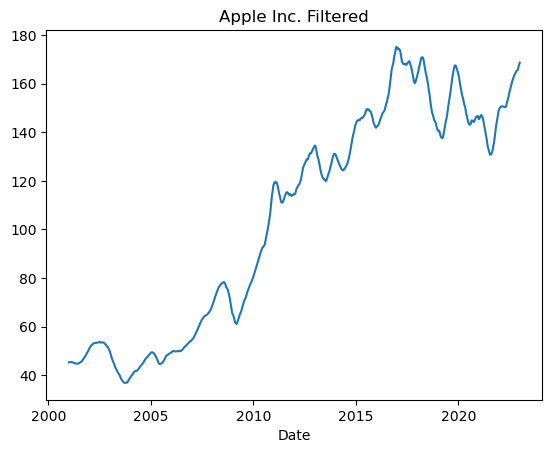

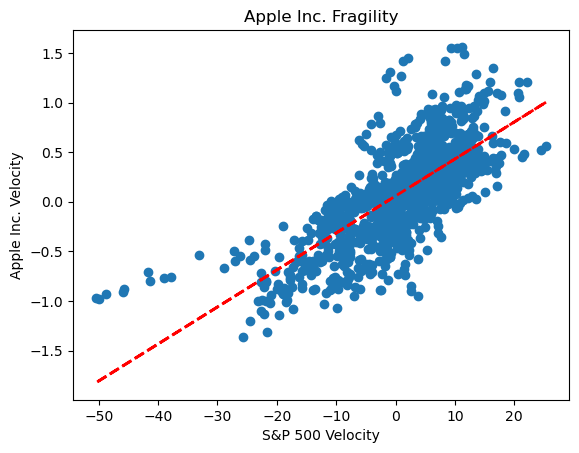

best fit line:
y = 0.06 + 0.04x
Apple Inc. Fragility index = 0.18891454178129297


0.18891454178129297

In [284]:
plot_fragility('AAPL')

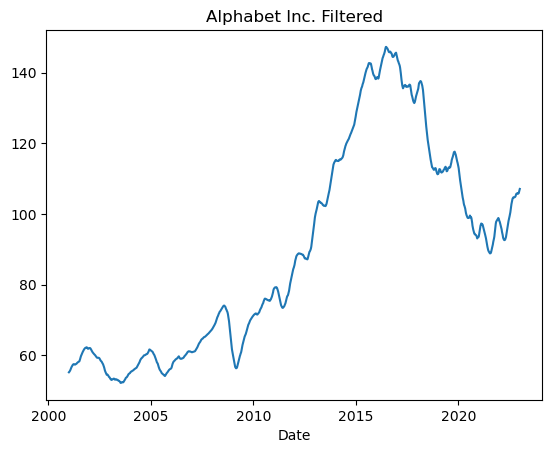

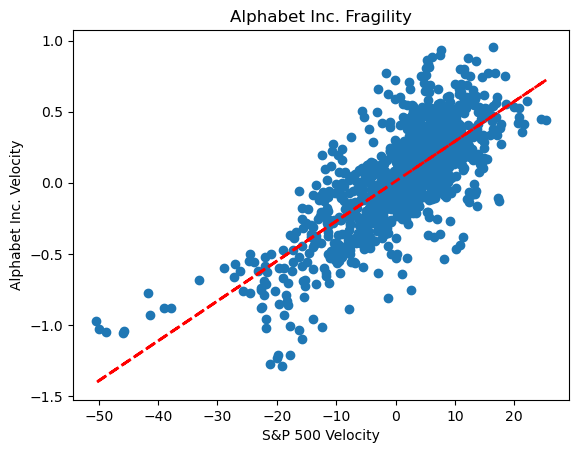

best fit line:
y = 0.01 + 0.03x
Alphabet Inc. Fragility index = -0.3232608374814378


-0.3232608374814378

In [285]:
plot_fragility('GOOGL')

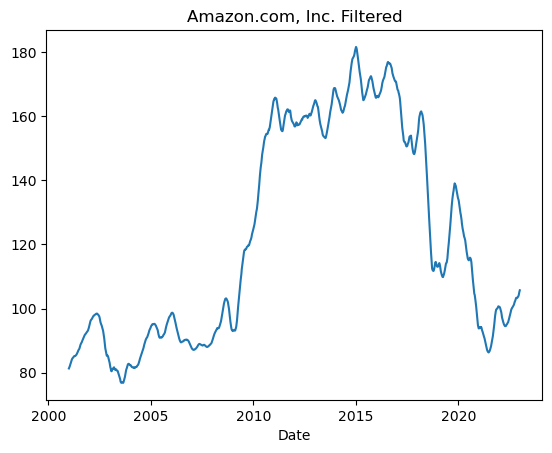

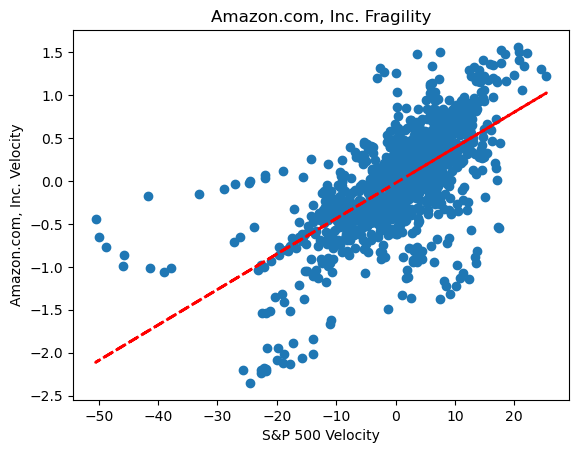

best fit line:
y = -0.03 + 0.04x
Amazon.com, Inc. Fragility index = -0.4211176415700728


-0.4211176415700728

In [286]:
plot_fragility('AMZN')

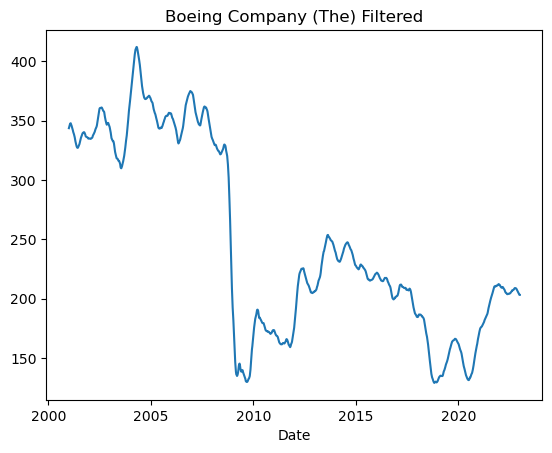

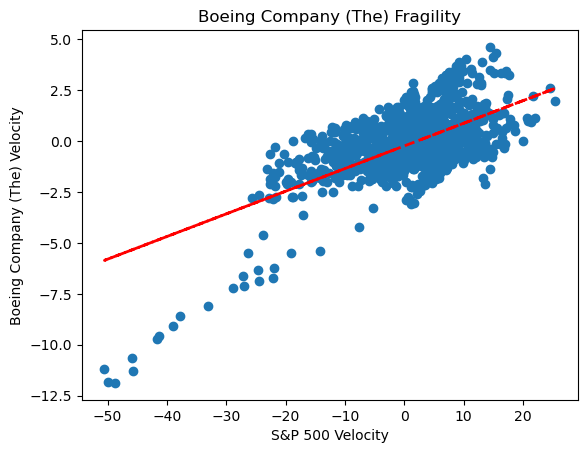

best fit line:
y = -0.24 + 0.11x
Boeing Company (The) Fragility index = -4.700495636226478


-4.700495636226478

In [287]:
plot_fragility('BA')

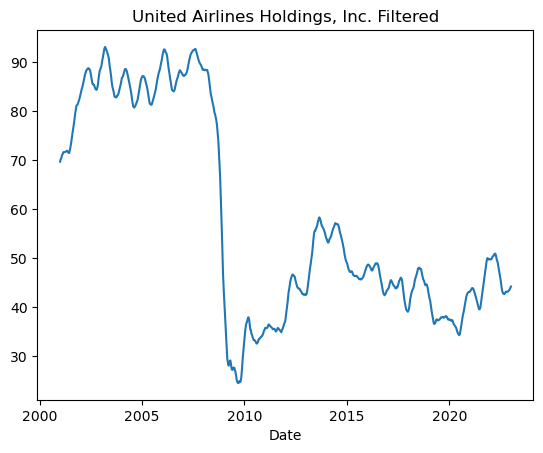

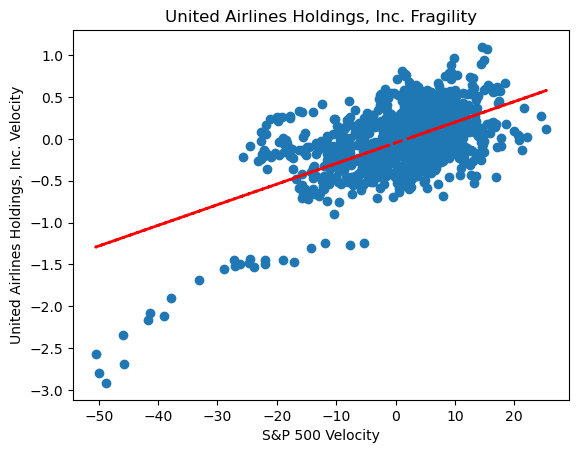

best fit line:
y = -0.05 + 0.02x
United Airlines Holdings, Inc. Fragility index = -1.086926966498325


-1.086926966498325

In [288]:
plot_fragility('UAL')

## Fragility Analysis

Looking at the fragility indices of the above evaluated companies we can see the following:
Apple: 0.188
Google: -0.323
Amazon: -0.421
Boeing: -4.700
United Airlines: -1.087

Antifragile: index > 0
Robust: index = 0
Fragile: index < 0

The only truly antifragile company here is Apple. By having a positive fragility index, we can see that Apple actually benefits from shocks in the market. This makes Apple an amazing company to invest in for the long term. Google and Amazon are only slightly fragile. They respond to shocks in the market only slightly negatively. This is because they are tech companies that are capable of adapting to various market pressures. Boeing and United Airlines on the other hand are incredibly fragile. This makes sense because their products (airplanes and air travel) are incredibly sensitive to market demands. Since the Covid pandmeic essentially eliminated air travel, they were severly affected. 

In [245]:
def analyze_portfolio(tickers):
    fragilities = []
    for ticker in tickers:
        fragilities.append(plot_fragility(ticker))        
    print()
    average_fragility = 0
    for i in range(len(tickers)):
        average_fragility += fragilities[i]
        ticker_ticker = yf.Ticker(tickers[i])
        ticker_name = ticker_ticker.info['shortName']
        print(ticker_name + " Fragility Index = " + str(fragilities[i]))
    average_fragility / len(fragilities)
    print()
    print("Portfolio Average Fragility: " + str(average_fragility))

Now that we can analyze a single candidate stock, we can apply this same methedology to an entire portfolio. We can also find the fragility of a portfolio by taking the average of the fragilities of the stocks in the portfolio.  

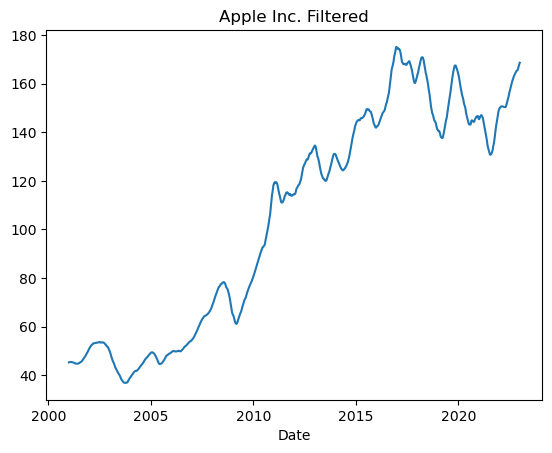

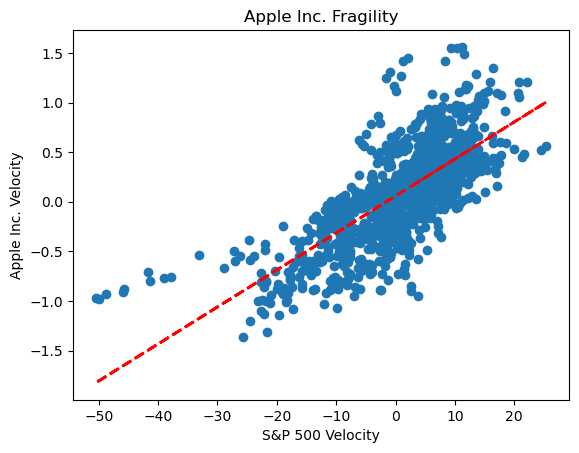

best fit line:
y = 0.06 + 0.04x
Apple Inc. Fragility index = 0.1889115339137622


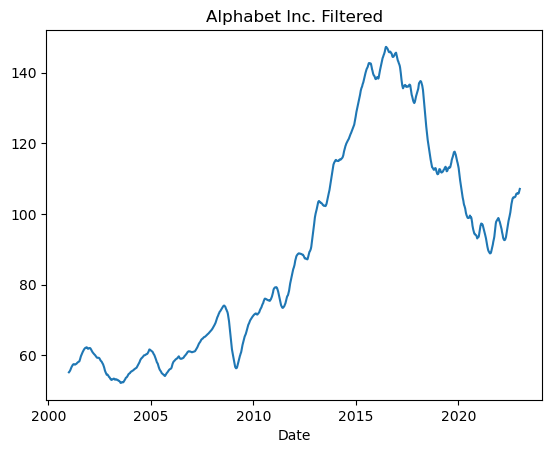

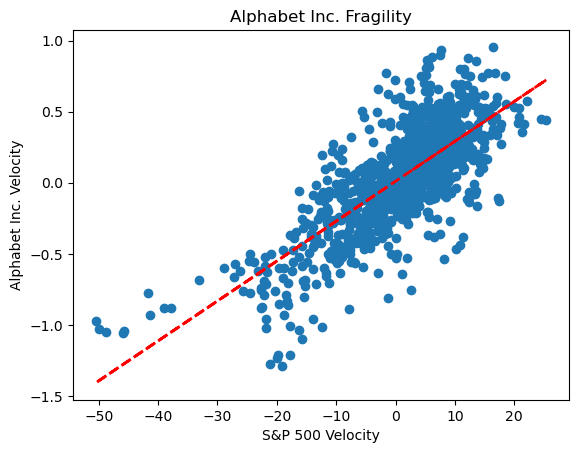

best fit line:
y = 0.01 + 0.03x
Alphabet Inc. Fragility index = -0.32326353104390937


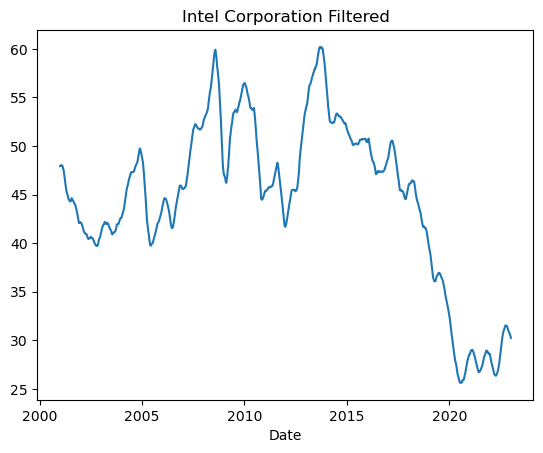

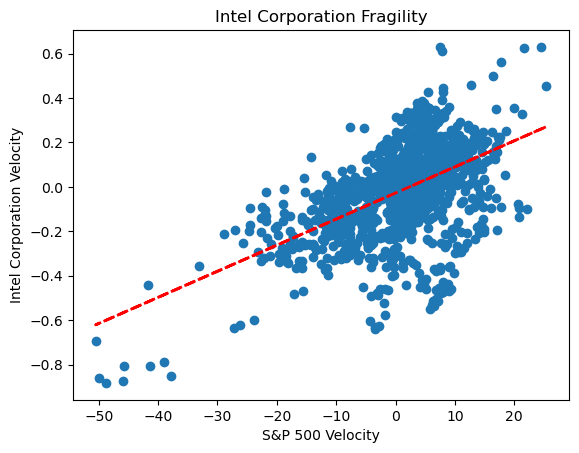

best fit line:
y = -0.03 + 0.01x
Intel Corporation Fragility index = -0.4155302688262818


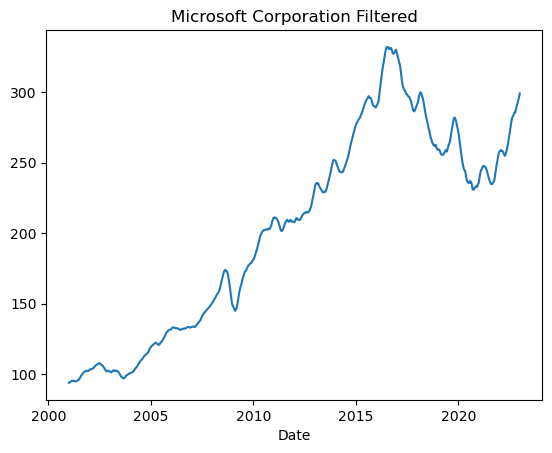

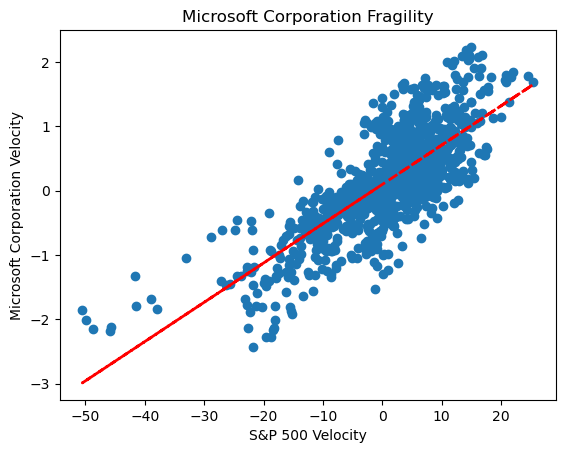

best fit line:
y = 0.10 + 0.06x
Microsoft Corporation Fragility index = 0.14732557699622614

Apple Inc. Fragility Index = 0.1889115339137622
Alphabet Inc. Fragility Index = -0.32326353104390937
Intel Corporation Fragility Index = -0.4155302688262818
Microsoft Corporation Fragility Index = 0.14732557699622614

Portfolio Average Fragility: -0.4025566889602028


In [289]:
# Tech company portfolio analysis
tech_tickers = ['AAPL', 'GOOGL', 'INTC', 'MSFT']
analyze_portfolio(tech_tickers)

## Analyzing the S&P 500

Now that we have an analysis methodology, we can try to analyze every ticker in the S&P 500 to find the most antifragile stocks. To do this, we can scrape the list of tickers from S&P 500 wikipedia page and then run them through our analysis. Finally, we can sort the tickers by their fragility index to find the most antifragile stocks.

In [292]:
def calculate_fragility(ticker):
    SP_500_ticker = yf.Ticker('^GSPC')
    SP_500 = SP_500_ticker.history(period="max")
    SP_500_filtered = moving_average(SP_500['Close'], 20)
    SP_500_velocity = np.gradient(SP_500_filtered)
    
    test_ticker = yf.Ticker(ticker)
    test = test_ticker.history(period="max")
    test_filtered = moving_average(test['Close'], 20)
    test_velocity = np.gradient(test_filtered)
    
    if len(SP_500_velocity) > len(test_velocity):
        test_velocity = np.pad(test_velocity, (0, len(SP_500_velocity) - len(test_velocity)))
    elif len(SP_500_velocity) < len(test_velocity):
        SP_500_velocity = np.pad(SP_500_velocity, (0, len(test_velocity) - len(SP_500_velocity)))
    
    fragility_index = sum(np.multiply(abs(SP_500_velocity), test_velocity)) / test_velocity.size
    
    return fragility_index

In [293]:
calculate_fragility('AAPL')

0.058216488936394764

In [250]:
import bs4 as bs
import requests
import datetime

In [253]:
# Code Source: https://stackoverflow.com/questions/58890570/python-yahoo-finance-download-all-sp-500-stocks
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)
print(tickers)

['MMM\n', 'AOS\n', 'ABT\n', 'ABBV\n', 'ACN\n', 'ATVI\n', 'ADM\n', 'ADBE\n', 'ADP\n', 'AAP\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'AKAM\n', 'ALK\n', 'ALB\n', 'ARE\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AMD\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'ABC\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'AON\n', 'APA\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ACGL\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'AZO\n', 'AVB\n', 'AVY\n', 'AXON\n', 'BKR\n', 'BALL\n', 'BAC\n', 'BBWI\n', 'BAX\n', 'BDX\n', 'WRB\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'TECH\n', 'BIIB\n', 'BLK\n', 'BK\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BRO\n', 'BF.B\n', 'BG\n', 'CHRW\n', 'CDNS\n', 'CZR\n', 'CPT\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CTLT\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'CNC\n', 'CNP\n', 'CDAY\n', 'CF\n', 'CRL\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 

In [294]:
tickers = [s.replace('\n', '') for s in tickers]
fragilities = []
for ticker in tickers:
    try:
        fragilities.append(calculate_fragility(ticker))
    except:
        print("No data found for " + ticker)

BRK.B: No data found, symbol may be delisted
No data found for BRK.B
BF.B: Period '22y' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']
No data found for BF.B
MU: No data found for this date range, symbol may be delisted
No data found for MU


In [296]:
ticker_fragilities = zip(fragilities, tickers)
ticker_fragilities = sorted(ticker_fragilities, reverse=True)
for ticker, fragility in ticker_fragilities:
    print(ticker, fragility)

1.8367494727782483 AZO
1.105132934399663 RTX
1.0778785573430998 CHTR
0.8239284603695893 META
0.5353020246129342 TJX
0.4483339768971562 NVDA
0.4089195579038369 EW
0.39627589588298645 WHR
0.30594455721707603 EA
0.2845953228860933 KIM
0.280619236846937 WY
0.27368510883843084 BMY
0.2733867269101163 ACN
0.2599816136001397 NXPI
0.25796179074133657 MOH
0.23552231041458846 AXON
0.2329586963589129 TSN
0.19606656512309803 STX
0.19435425132223375 MKC
0.19316682657924844 UAL
0.1884132926874808 FFIV
0.18697338216017736 TSLA
0.18410081078094745 HWM
0.18074321845621327 STE
0.17882365242118411 CFG
0.17259886199401003 VRSN
0.1605923344430546 INCY
0.15877845994090214 ETR
0.1584489571210952 MS
0.15584309121841483 BG
0.15355716403669764 XYL
0.15182294962584414 ALB
0.14145868211183912 MLM
0.12861396650788445 NDSN
0.12496905295862835 UNP
0.12477177160918021 CTVA
0.1179063958300217 TXT
0.11374927787186721 C
0.11369666388246484 VMC
0.10686193895318113 PARA
0.10676716069877405 SHW
0.10643304072141173 VFC
0.105

## Final Portfolio

Now that we have our sorted list of tickers with fragility indeces, we can run a final analysis of the portfolio.

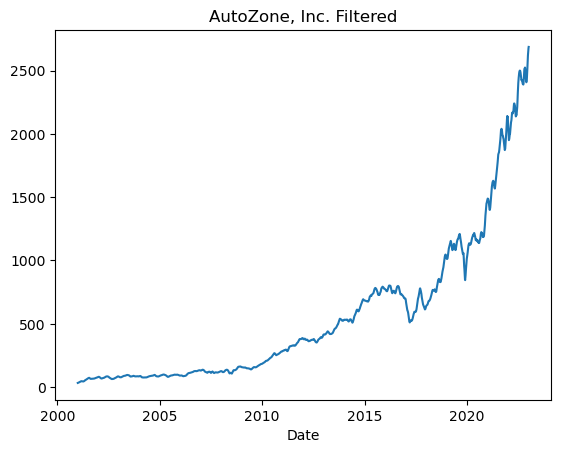

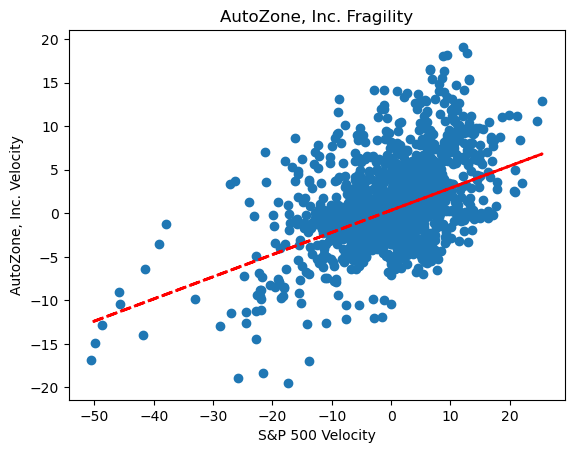

best fit line:
y = 0.35 + 0.25x
AutoZone, Inc. Fragility index = 1.8368256249556667


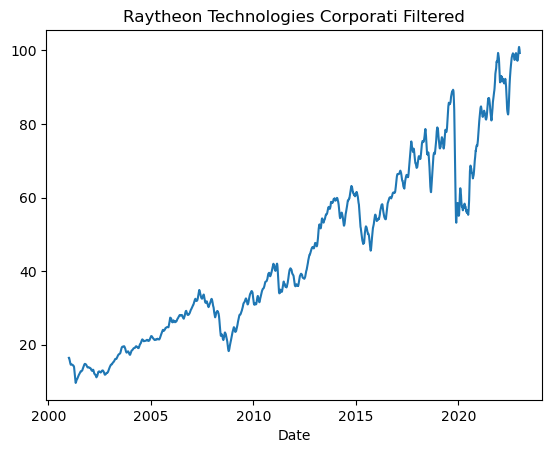

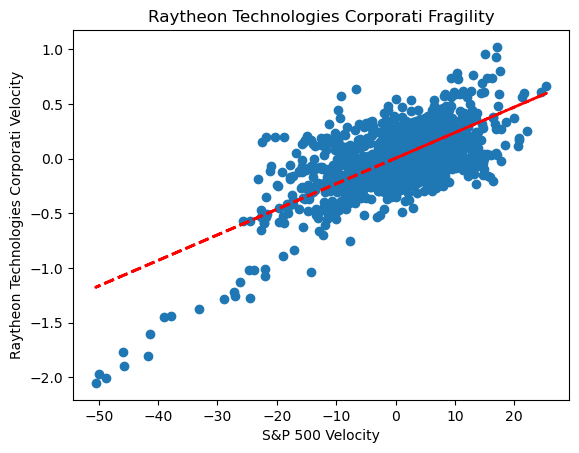

best fit line:
y = 0.00 + 0.02x
Raytheon Technologies Corporati Fragility index = -0.1284631207154293


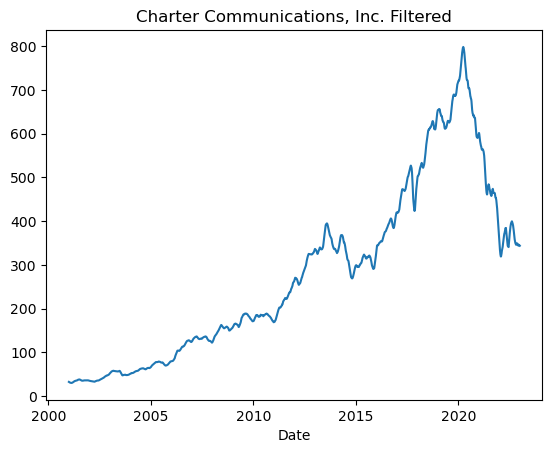

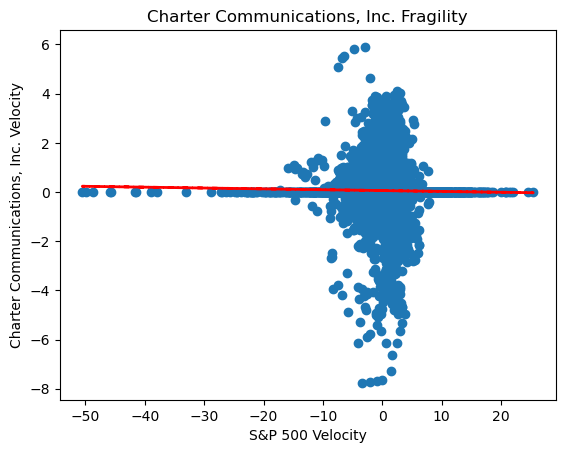

best fit line:
y = 0.06 + -0.00x
Charter Communications, Inc. Fragility index = 0.06315511548044393


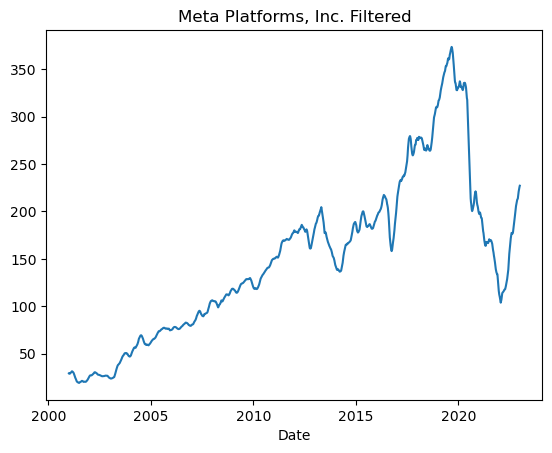

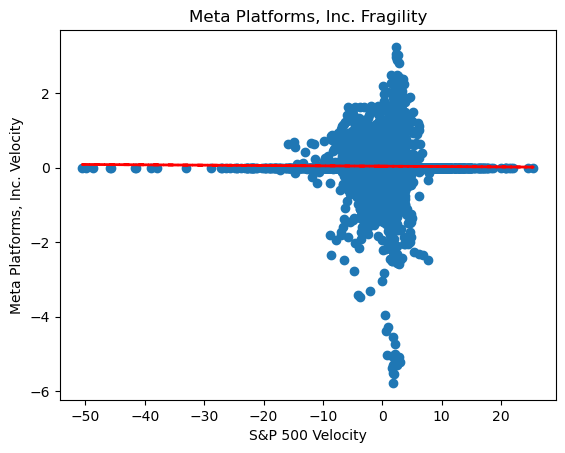

best fit line:
y = 0.04 + -0.00x
Meta Platforms, Inc. Fragility index = 0.07929913002557192


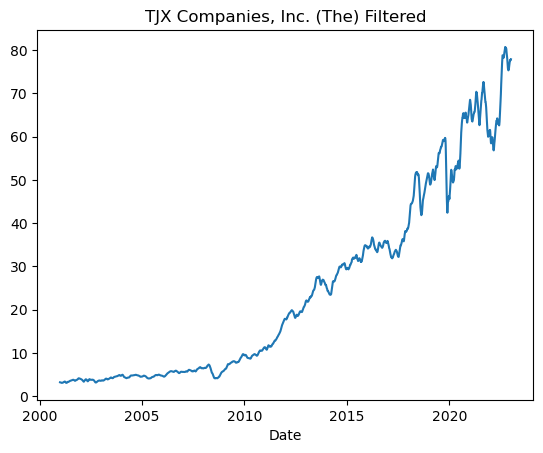

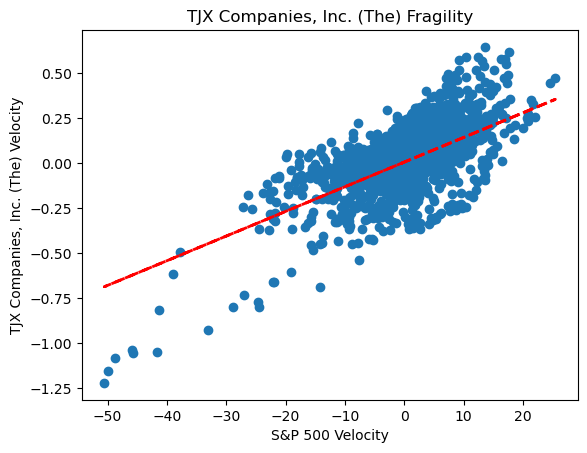

best fit line:
y = 0.01 + 0.01x
TJX Companies, Inc. (The) Fragility index = -0.007287741977659828


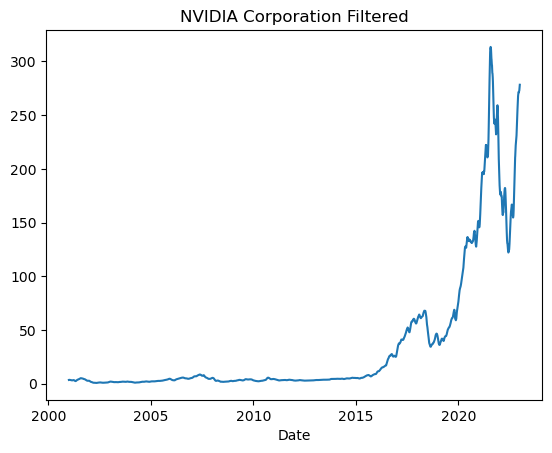

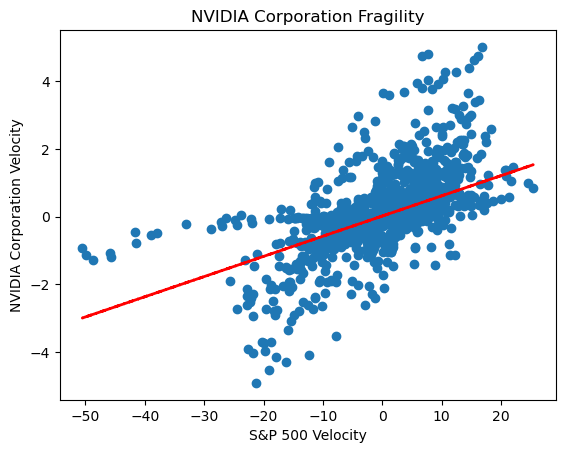

best fit line:
y = 0.02 + 0.06x
NVIDIA Corporation Fragility index = 0.10510683842516602

AutoZone, Inc. Fragility Index = 1.8368256249556667
Raytheon Technologies Corporati Fragility Index = -0.1284631207154293
Charter Communications, Inc. Fragility Index = 0.06315511548044393
Meta Platforms, Inc. Fragility Index = 0.07929913002557192
TJX Companies, Inc. (The) Fragility Index = -0.007287741977659828
NVIDIA Corporation Fragility Index = 0.10510683842516602

Portfolio Average Fragility: 1.9486358461937594


In [300]:
# High Antifragility Portfolio
antifragile_tickers = ['AZO', 'RTX', 'CHTR', 'META', 'TJX', 'NVDA']
analyze_portfolio(antifragile_tickers)

Most of these antifragile companies are incredibly resilient to market shocks. It appears that this antifragility metric is a good way to determine if a company will be able to withstand black swan events. A good investment strategy for this portfolio would be to buy even more stock during a black swan event because we know with good certainty that the company will rebound. 